<a href="https://colab.research.google.com/github/klb2006/FMML/blob/main/Module_7_Updated_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

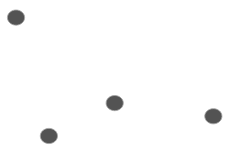

We can assign each of these points to a separate cluster:

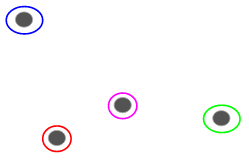

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

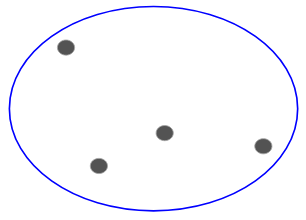

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

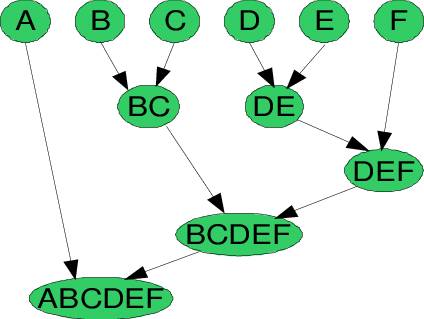

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

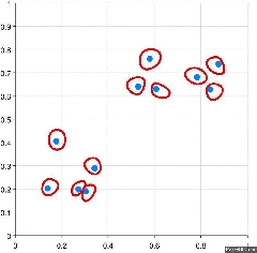

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

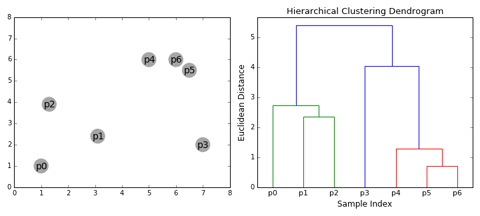



Note:-

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters.

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

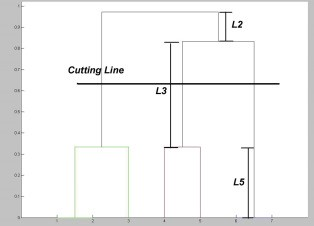

In [1]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   1508      0  0:00:02  0:00:02 --:--:--  2836
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0   7007      0  0:00:02  0:00:02 --:--:-- 17924


### Agglomerative Clustering on Mall Visitors Database

In [2]:
# importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

Let's load the dataset

In [3]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [4]:
X = dataset.iloc[:, [3, 4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

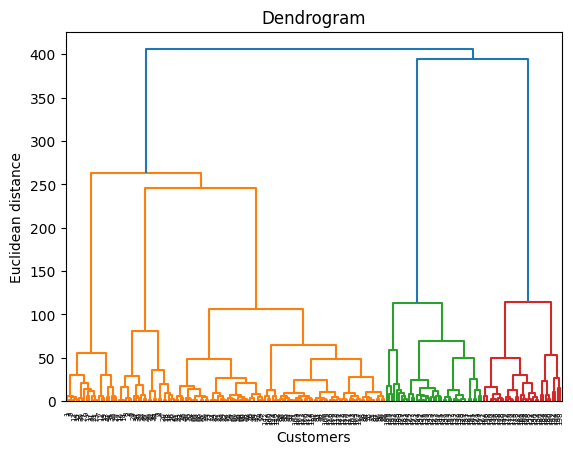

In [5]:
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [6]:
# importing AgglomerativeClustering algorithm from sklearn
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#### Visualizing the results.

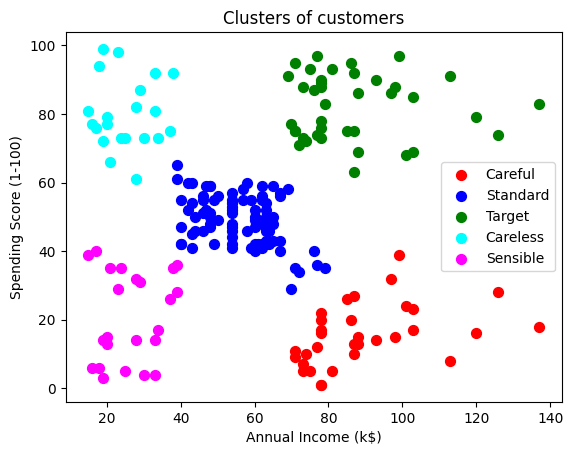

In [7]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [8]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages -

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



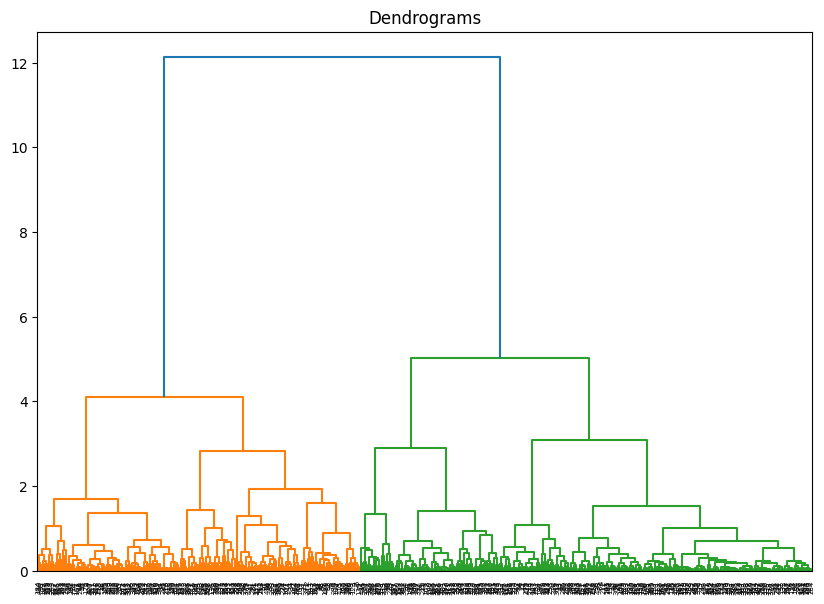

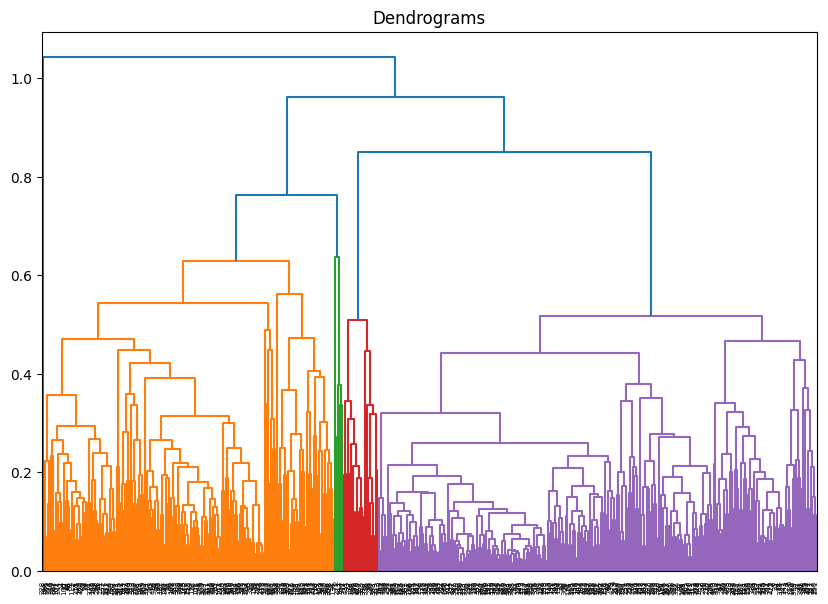

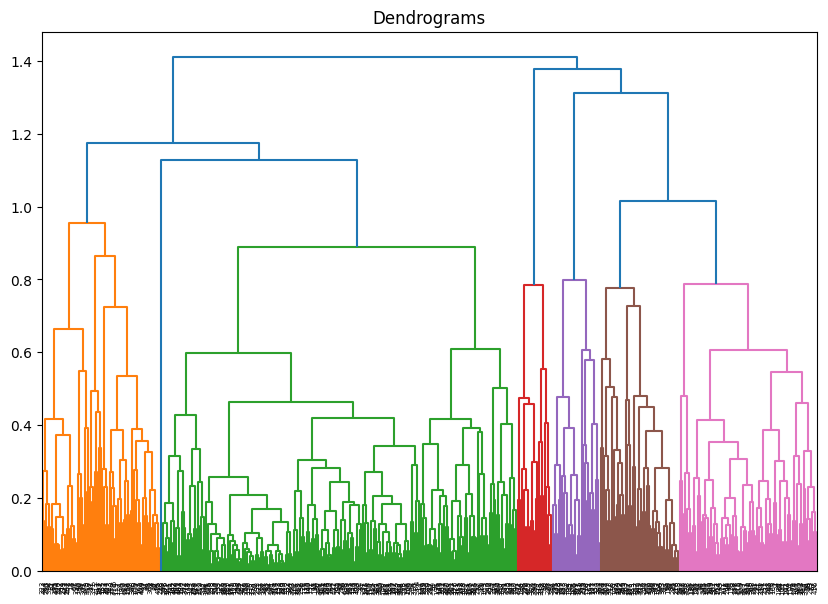

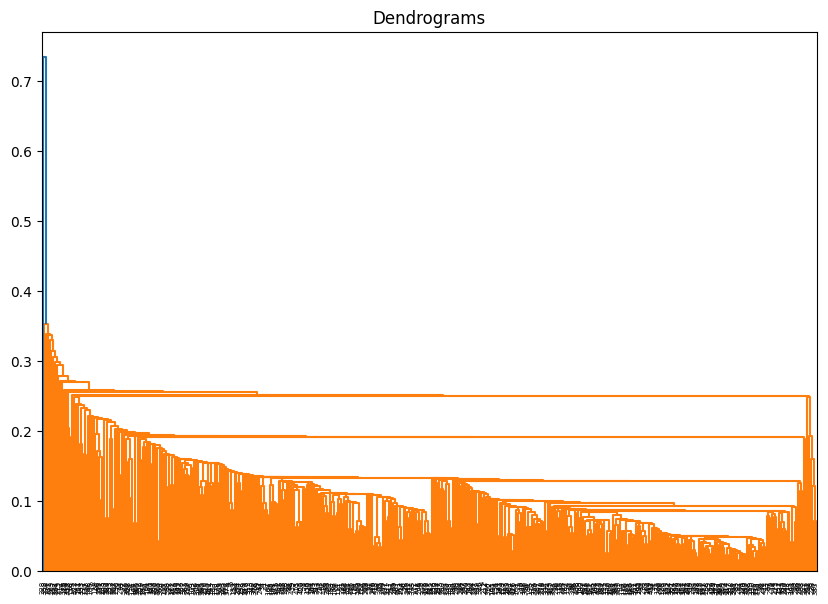

In [11]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

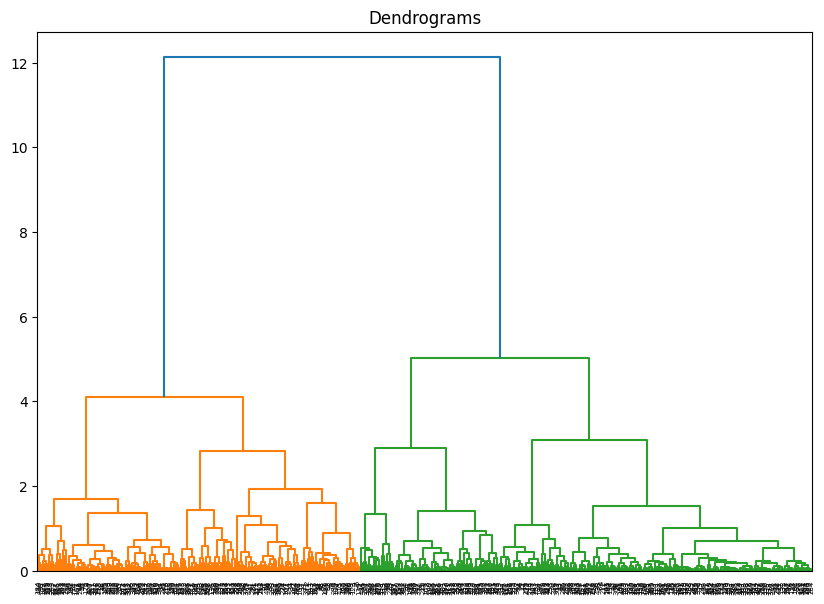

In [12]:
threshold = 95 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

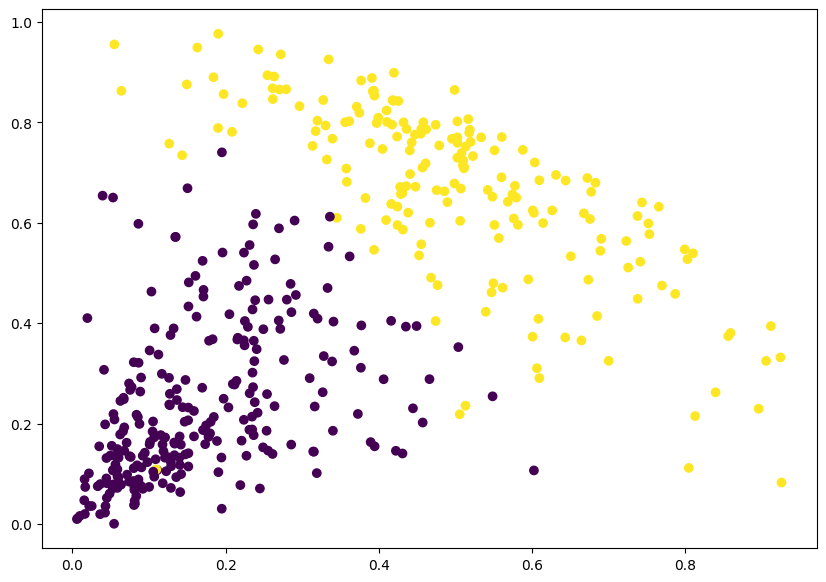

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

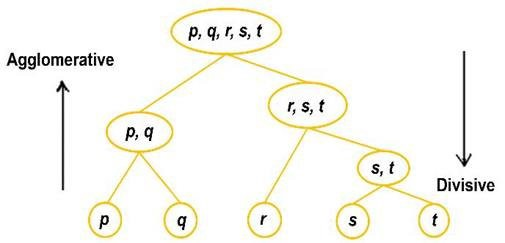

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

Divisive clustering methods are fairly complicated to implement, so we will not do that here. You can check out open source implementations like https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA- for further details.

## Points to think about
1. What is the need for hierarchical clustering?

1ans)
Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It is particularly useful in various scenarios due to the following reasons:

1. No Need to Pre-Specify the Number of Clusters

Unlike methods like k-means clustering, hierarchical clustering does not require you to define the number of clusters in advance. This is useful when you don’t have prior knowledge about the dataset.


2. Produces a Dendrogram

Hierarchical clustering creates a dendrogram, which is a tree-like diagram that shows the arrangement of clusters formed at each step. This visualization helps in:

Understanding the structure of the data.

Determining the optimal number of clusters by cutting the dendrogram at a specific level.



3. Captures Nested Patterns

It can capture nested clusters (clusters within clusters), making it ideal for datasets where groups are naturally hierarchical, like:

Biological taxonomy (species classification).

Document clustering (organizing documents into topics and subtopics).



4. Flexibility with Different Distance Metrics

Hierarchical clustering can work with various distance/similarity measures (Euclidean, Manhattan, cosine similarity, etc.) and linkage criteria (single, complete, average linkage), offering flexibility for different types of data.


5. Better for Small to Medium-Sized Datasets

It performs well on small to medium-sized datasets where the computational cost isn’t prohibitive. The algorithm becomes less efficient with very large datasets due to its O(n²) or O(n³) time complexity.


6. Deterministic Results

Unlike k-means, which can give different results on different runs (due to random initialization), hierarchical clustering is deterministic—the same dataset will always produce the same clusters.


Applications:

Gene expression analysis in bioinformatics.

Customer segmentation in marketing.

Image segmentation in computer vision.

Document clustering in natural language processing.


Would you like me to dive deeper into any specific part, like the types of hierarchical clustering or how linkage methods work?

2)What are the key differences between KMeans Clustering and Hierarchical Clustering?

2ans)
KMeans Clustering and Hierarchical Clustering are two popular unsupervised machine learning algorithms used for grouping similar data points into clusters. Here's a breakdown of their key differences:
KMeans Clustering
 * Approach: Partitions data into a predefined number of clusters (k) by iteratively assigning data points to the nearest cluster center (centroid).
 * Process:
   * Randomly initialize k centroids.
   * Assign each data point to the nearest centroid.
   * Recalculate centroids based on the mean of assigned data points.
   * Repeat steps 2 and 3 until convergence.
 * Strengths:
   * Simple and efficient, especially for large datasets.
   * Easy to implement and understand.
 * Weaknesses:
   * Requires specifying the number of clusters (k) beforehand.
   * Sensitive to initial centroid positions and outliers.
   * Assumes clusters are spherical and equally sized.
Hierarchical Clustering
 * Approach: Builds a hierarchy of clusters, either top-down (divisive) or bottom-up (agglomerative).
 * Process (Agglomerative):
   * Start with each data point as a separate cluster.
   * Merge the two closest clusters.
   * Repeat step 2 until all data points belong to a single cluster.
 * Strengths:
   * No need to specify the number of clusters beforehand.
   * Can reveal hierarchical relationships between clusters.
   * More robust to outliers than KMeans.
 * Weaknesses:
   * Computationally expensive, especially for large datasets.
   * Can be sensitive to the choice of distance metric.
Key Differences Summarized
| Feature | KMeans Clustering | Hierarchical Clustering |
|---|---|---|
| Approach | Partitioning | Hierarchical |
| Number of Clusters | Predefined (k) | Not required beforehand |
| Computational Complexity | Lower | Higher |
| Sensitivity to Outliers | Higher | Lower |
| Cluster Shape Assumption | Spherical, equal size | No specific assumption |
| Output | Flat clusters | Hierarchy (dendrogram) |
Choosing Between KMeans and Hierarchical Clustering
The choice between KMeans and Hierarchical Clustering depends on the specific dataset and the goals of the analysis.
 * KMeans is suitable for large datasets where the number of clusters is known or can be estimated.
 * Hierarchical Clustering is more appropriate for smaller datasets where the hierarchical relationships between clusters are of interest.
Feel free to ask if you have any more questions or want to explore specific scenarios!

3)What is the advantages of Density Based Clustering over KMeans?

3ans)
Density-based clustering, like DBSCAN, offers several advantages over KMeans clustering, primarily stemming from its different approach to identifying clusters. Here are some key advantages:
1. No need to specify the number of clusters:
 * KMeans requires you to predefine the number of clusters (k) before running the algorithm. This can be challenging when you have no prior knowledge about the data structure.
 * Density-based clustering algorithms like DBSCAN automatically discover the number of clusters based on the data's density distribution. This makes them more flexible and easier to use when the number of clusters is unknown.
2. Ability to find clusters of arbitrary shapes:
 * KMeans assumes that clusters are spherical and equally sized. This assumption often doesn't hold true for real-world data, where clusters can have complex and irregular shapes.
 * Density-based clustering can identify clusters of any shape, as it defines clusters based on the density of data points rather than their distance from a centroid. This allows it to capture more complex relationships in the data.
3. Robustness to outliers:
 * KMeans is sensitive to outliers, as they can significantly influence the position of cluster centroids.
 * Density-based clustering is more robust to outliers. It can identify outliers as noise points that do not belong to any cluster, effectively separating them from the actual clusters.
4. Better performance with overlapping clusters:
 * KMeans struggles to handle overlapping clusters, as it assigns each data point to only one cluster.
 * Density-based clustering can handle overlapping clusters more effectively, as it defines clusters based on density connectivity, allowing data points to belong to multiple overlapping clusters.
5. More intuitive cluster representation:
 * Density-based clustering often provides a more intuitive representation of clusters, as it groups data points based on their natural density relationships. This can be more meaningful and interpretable than the centroid-based representation of KMeans.
However, density-based clustering also has its limitations:
 * It can be computationally more expensive than KMeans, especially for large datasets.
 * It requires tuning parameters like the radius and minimum number of points, which can influence the clustering results.
In summary, density-based clustering offers significant advantages over KMeans when dealing with complex datasets where the number of clusters is unknown, clusters have arbitrary shapes, and outliers are present. However, it's essential to consider its computational cost and parameter tuning requirements before choosing it over KMeans.

## Conclusion


Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.

## Resources and References

1. https://en.wikipedia.org/wiki/Hierarchical_clustering
2. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
3. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
4. https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

### Exercises

1)Play around with different linkages and thresholds for Mall data, then use the same code base for IRIS and DIGITS dataset, to see if the optimal clusters is reasonable or not (iris should be three, digits should be 10)

Mall - Linkage: ward, Clusters: 2, Silhouette: 0.3842337621772661


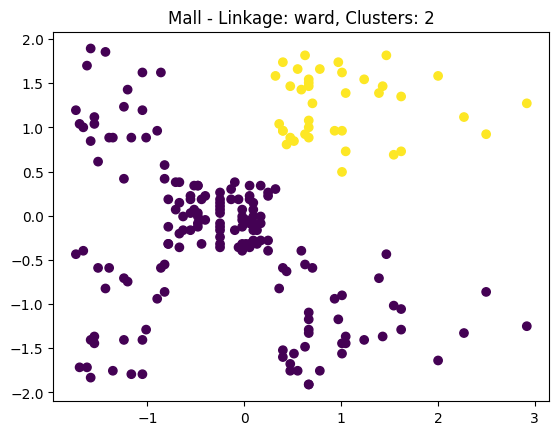

Mall - Linkage: ward, Clusters: 3, Silhouette: 0.4610481446570447


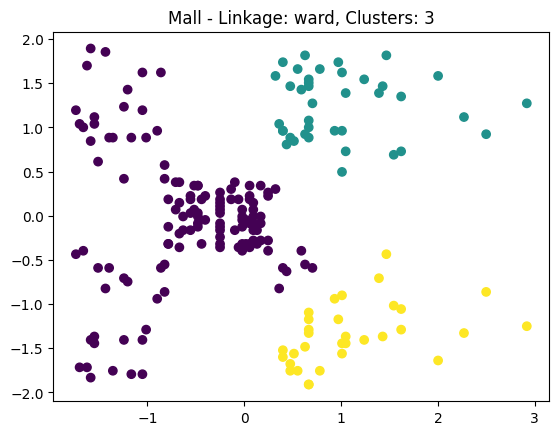

Mall - Linkage: ward, Clusters: 4, Silhouette: 0.4925507715349343


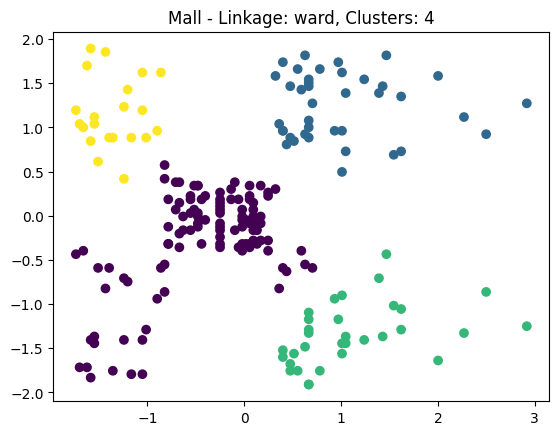

Mall - Linkage: ward, Clusters: 5, Silhouette: 0.5538089226688662


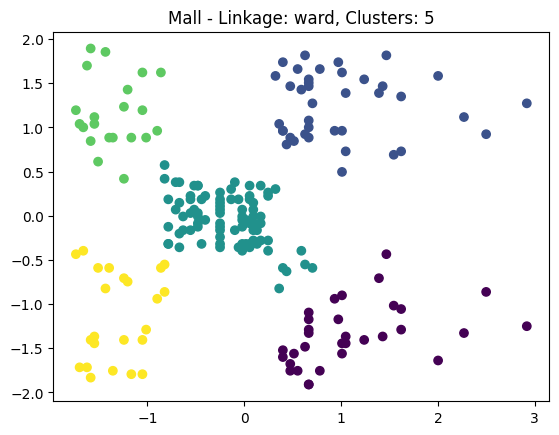

Mall - Linkage: ward, Clusters: 6, Silhouette: 0.5386761871036926


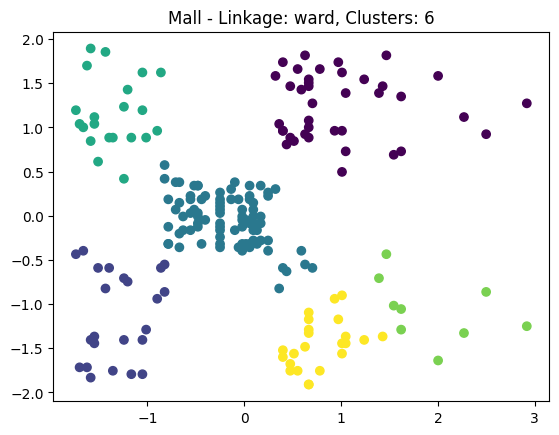

Mall - Linkage: complete, Clusters: 2, Silhouette: 0.36071083057634323


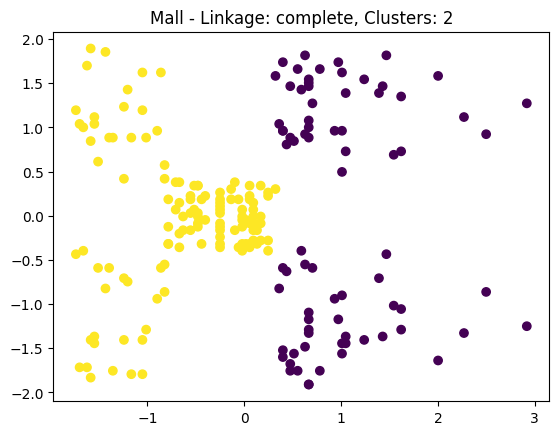

Mall - Linkage: complete, Clusters: 3, Silhouette: 0.46658474419000145


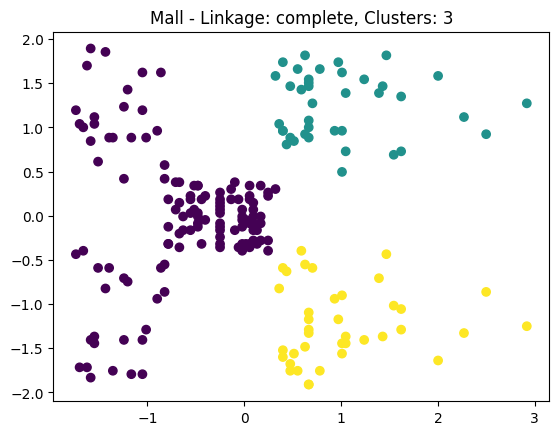

Mall - Linkage: complete, Clusters: 4, Silhouette: 0.49588122834195303


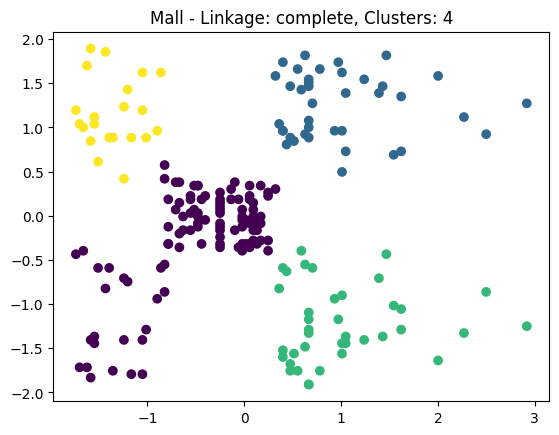

Mall - Linkage: complete, Clusters: 5, Silhouette: 0.5531118656926701


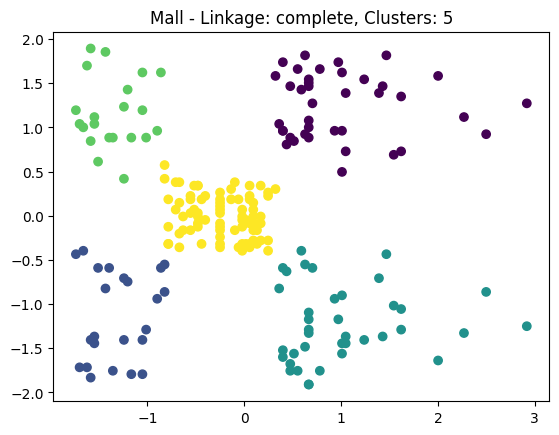

Mall - Linkage: complete, Clusters: 6, Silhouette: 0.5440860136367434


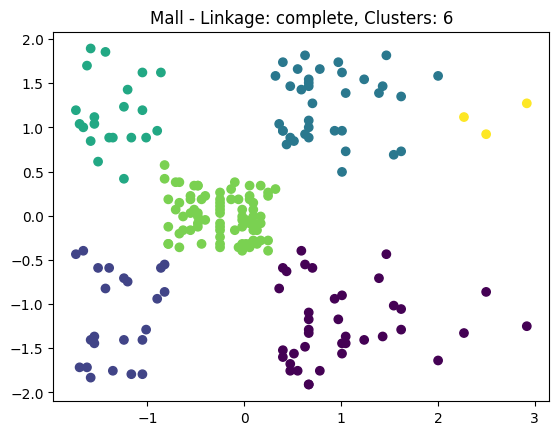

Mall - Linkage: average, Clusters: 2, Silhouette: 0.3842337621772661


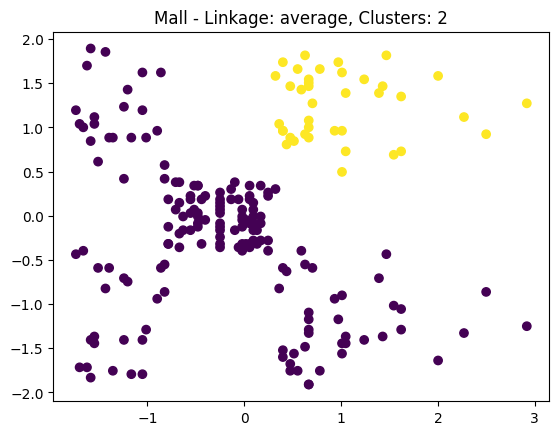

Mall - Linkage: average, Clusters: 3, Silhouette: 0.46658474419000145


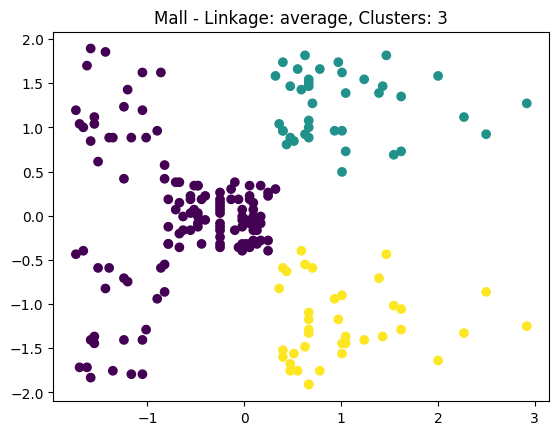

Mall - Linkage: average, Clusters: 4, Silhouette: 0.49588122834195303


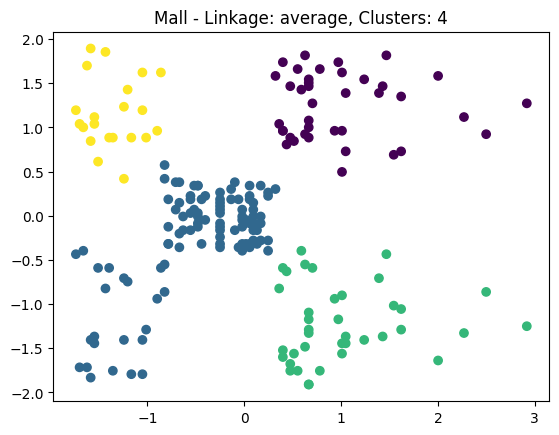

Mall - Linkage: average, Clusters: 5, Silhouette: 0.4794263081846086


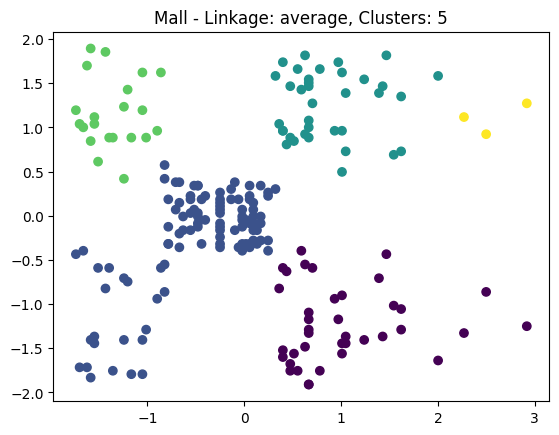

Mall - Linkage: average, Clusters: 6, Silhouette: 0.46540298817361486


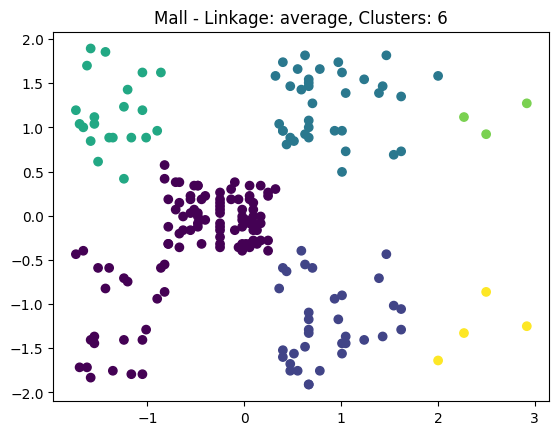

Mall - Linkage: single, Clusters: 2, Silhouette: 0.43387620121792864


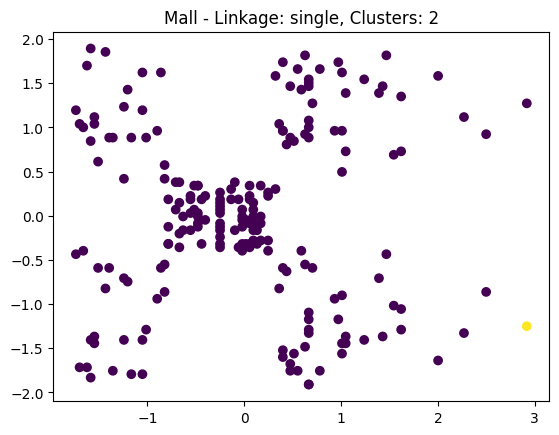

Mall - Linkage: single, Clusters: 3, Silhouette: 0.3613319297400044


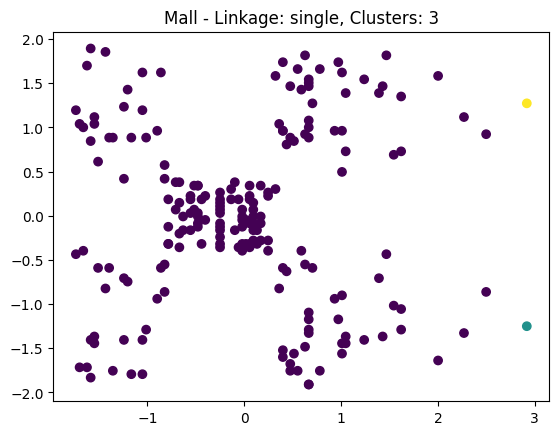

Mall - Linkage: single, Clusters: 4, Silhouette: 0.30405882142744345


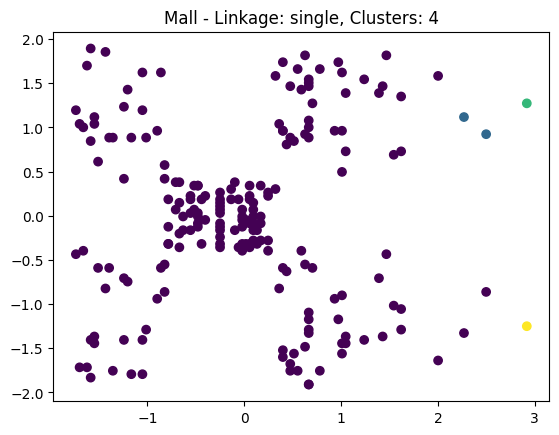

Mall - Linkage: single, Clusters: 5, Silhouette: 0.2758004412314313


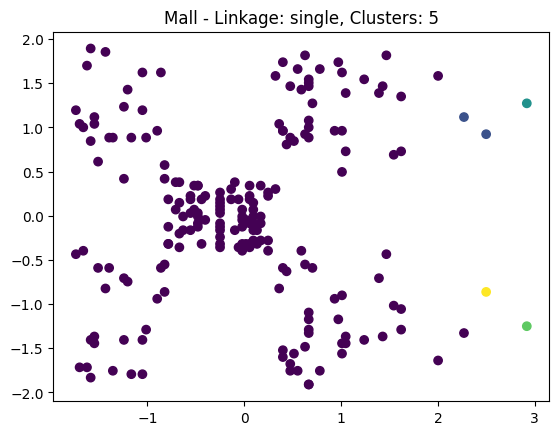

Mall - Linkage: single, Clusters: 6, Silhouette: 0.2797674027951988


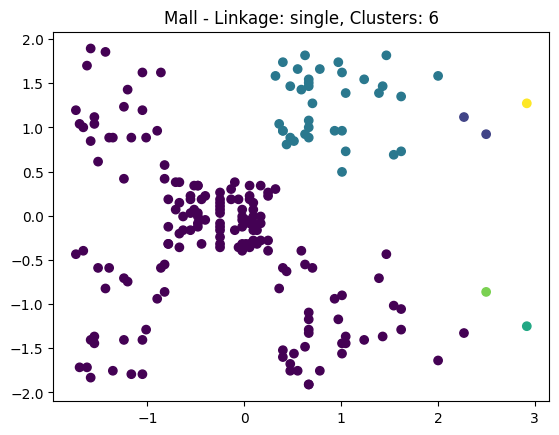


Best Mall Result: Linkage=ward, Clusters=5, Silhouette=0.5538089226688662
Iris - Linkage: ward, Silhouette: 0.4466890410285909


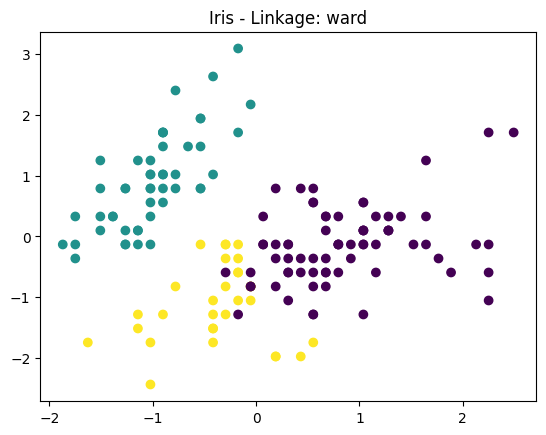

Iris - Linkage: complete, Silhouette: 0.44961848359884726


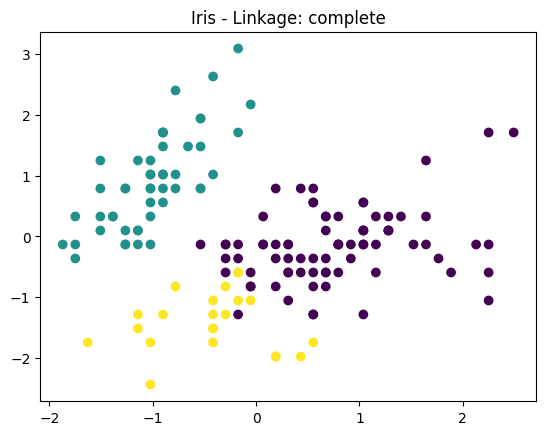

Iris - Linkage: average, Silhouette: 0.4802669329728697


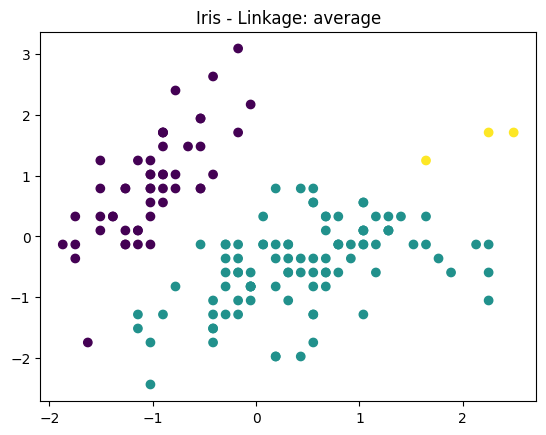

Iris - Linkage: single, Silhouette: 0.504645610832545


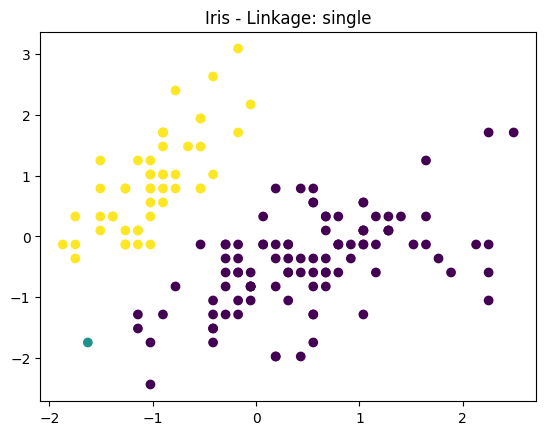


Best Iris Result: Linkage=single, Silhouette=0.504645610832545
Digits - Linkage: ward, Silhouette: 0.12532527779196986


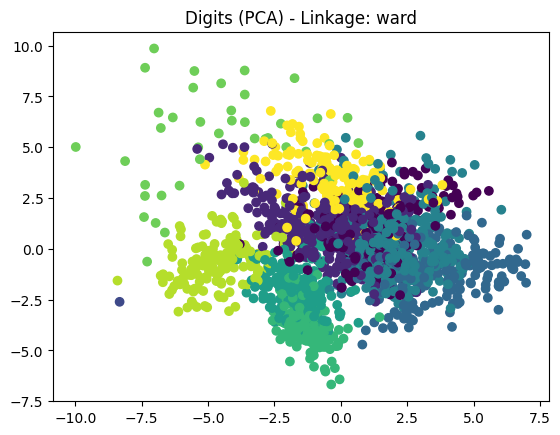

Digits - Linkage: complete, Silhouette: 0.3857382002204226


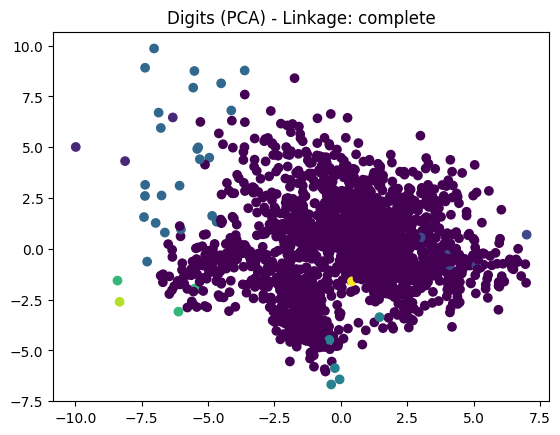

Digits - Linkage: average, Silhouette: 0.5317322123880858


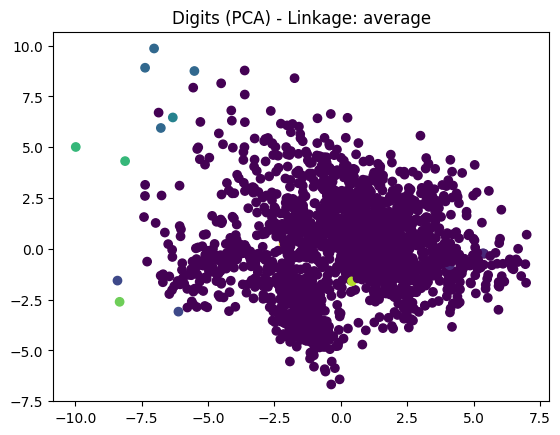

Digits - Linkage: single, Silhouette: 0.4711199596264649


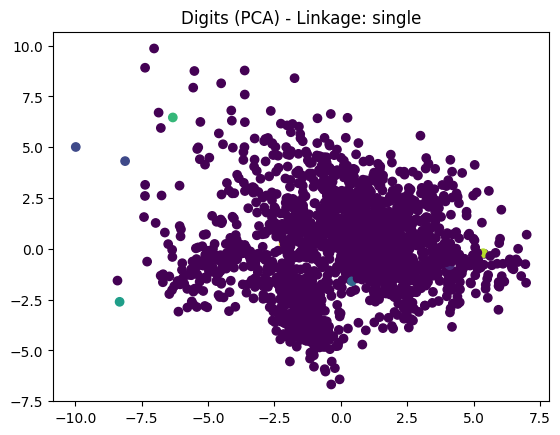


Best Digits Result: Linkage=average, Silhouette=0.5317322123880858


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA  # For Digits visualization

# Mall Customer Data
try:
    mall_data = pd.read_csv('Mall_Customers.csv')
    X_mall = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].values
    X_mall_scaled = StandardScaler().fit_transform(X_mall)

    best_mall_score = -1  # Initialize
    best_mall_linkage = None
    best_mall_n_clusters = None

    for linkage in ['ward', 'complete', 'average', 'single']:
        for n_clusters in range(2, 7):  # Explore a range
            hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = hc.fit_predict(X_mall_scaled)
            silhouette = silhouette_score(X_mall_scaled, labels)

            print(f"Mall - Linkage: {linkage}, Clusters: {n_clusters}, Silhouette: {silhouette}")

            if silhouette > best_mall_score:
                best_mall_score = silhouette
                best_mall_linkage = linkage
                best_mall_n_clusters = n_clusters

            # Plotting (Optional)
            plt.figure()
            plt.scatter(X_mall_scaled[:, 0], X_mall_scaled[:, 1], c=labels, cmap='viridis')
            plt.title(f"Mall - Linkage: {linkage}, Clusters: {n_clusters}")
            plt.show()

    print(f"\nBest Mall Result: Linkage={best_mall_linkage}, Clusters={best_mall_n_clusters}, Silhouette={best_mall_score}")


except FileNotFoundError:
    print("Mall_Customers.csv not found. Skipping Mall data.")
except Exception as e:
    print(f"An error occurred with Mall data: {e}")



# Iris Dataset
iris = load_iris()
X_iris = iris.data
X_iris_scaled = StandardScaler().fit_transform(X_iris)

best_iris_score = -1
best_iris_linkage = None

for linkage in ['ward', 'complete', 'average', 'single']:
    hc = AgglomerativeClustering(n_clusters=3, linkage=linkage)  # Iris: 3 clusters
    labels = hc.fit_predict(X_iris_scaled)
    silhouette = silhouette_score(X_iris_scaled, labels)
    print(f"Iris - Linkage: {linkage}, Silhouette: {silhouette}")

    if silhouette > best_iris_score:
        best_iris_score = silhouette
        best_iris_linkage = linkage

    plt.figure()
    plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f"Iris - Linkage: {linkage}")
    plt.show()

print(f"\nBest Iris Result: Linkage={best_iris_linkage}, Silhouette={best_iris_score}")


# Digits Dataset
digits = load_digits()
X_digits = digits.data
X_digits_scaled = StandardScaler().fit_transform(X_digits)

best_digits_score = -1
best_digits_linkage = None

for linkage in ['ward', 'complete', 'average', 'single']:
    hc = AgglomerativeClustering(n_clusters=10, linkage=linkage)  # Digits: 10 clusters
    labels = hc.fit_predict(X_digits_scaled)
    silhouette = silhouette_score(X_digits_scaled, labels)
    print(f"Digits - Linkage: {linkage}, Silhouette: {silhouette}")

    if silhouette > best_digits_score:
        best_digits_score = silhouette
        best_digits_linkage = linkage

    # PCA for visualization (2 components)
    pca = PCA(n_components=2)
    X_digits_pca = pca.fit_transform(X_digits_scaled)
    plt.figure()
    plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f"Digits (PCA) - Linkage: {linkage}")
    plt.show()

print(f"\nBest Digits Result: Linkage={best_digits_linkage}, Silhouette={best_digits_score}")

2)Compare the results of the that with Kmeans on the same datasets, this would require using Kmeans on Mall dataset and Wholesale customer dataset.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA

# Mall Customer Data
try:
    mall_data = pd.read_csv('Mall_Customers.csv')
    X_mall = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].values
    X_mall_scaled = StandardScaler().fit_transform(X_mall)

    # Hierarchical Clustering
    best_mall_hc_score = -1
    best_mall_hc_linkage = None
    best_mall_hc_n_clusters = None

    for linkage in ['ward', 'complete', 'average', 'single']:
        for n_clusters in range(2, 7):
            hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = hc.fit_predict(X_mall_scaled)
            silhouette = silhouette_score(X_mall_scaled, labels)

            print(f"Mall (HC) - Linkage: {linkage}, Clusters: {n_clusters}, Silhouette: {silhouette}")

            if silhouette > best_mall_hc_score:
                best_mall_hc_score = silhouette
                best_mall_hc_linkage = linkage
                best_mall_hc_n_clusters = n_clusters

    print(f"\nBest Mall (HC) Result: Linkage={best_mall_hc_linkage}, Clusters={best_mall_hc_n_clusters}, Silhouette={best_mall_hc_score}")

    # KMeans Clustering
    best_mall_kmeans_score = -1
    best_mall_kmeans_n_clusters = None

    for n_clusters in range(2, 7):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X_mall_scaled)
        silhouette = silhouette_score(X_mall_scaled, labels)

        print(f"Mall (KMeans) - Clusters: {n_clusters}, Silhouette: {silhouette}")

        if silhouette > best_mall_kmeans_score:
            best_mall_kmeans_score = silhouette
            best_mall_kmeans_n_clusters = n_clusters

    print(f"\nBest Mall (KMeans) Result: Clusters={best_mall_kmeans_n_clusters}, Silhouette={best_mall_kmeans_score}")

except FileNotFoundError:
    print("Mall_Customers.csv not found. Skipping Mall data.")
except Exception as e:
    print(f"An error occurred with Mall data: {e}")


# Iris Dataset
iris = load_iris()
X_iris = iris.data
X_iris_scaled = StandardScaler().fit_transform(X_iris)

# Hierarchical Clustering (same logic as Mall)
best_iris_hc_score = -1
best_iris_hc_linkage = None

for linkage in ['ward', 'complete', 'average', 'single']:
    hc = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = hc.fit_predict(X_iris_scaled)
    silhouette = silhouette_score(X_iris_scaled, labels)
    print(f"Iris (HC) - Linkage: {linkage}, Silhouette: {silhouette}")
    if silhouette > best_iris_hc_score:
        best_iris_hc_score = silhouette
        best_iris_hc_linkage = linkage
print(f"\nBest Iris (HC) Result: Linkage={best_iris_hc_linkage}, Silhouette={best_iris_hc_score}")

# KMeans Clustering
kmeans_iris = KMeans(n_clusters=3, random_state=42)
labels_iris = kmeans_iris.fit_predict(X_iris_scaled)
silhouette_iris = silhouette_score(X_iris_scaled, labels_iris)
print(f"Iris (KMeans) - Silhouette: {silhouette_iris}")



# Digits Dataset
digits = load_digits()
X_digits = digits.data
X_digits_scaled = StandardScaler().fit_transform(X_digits)

# Hierarchical Clustering (same logic as Mall)
best_digits_hc_score = -1
best_digits_hc_linkage = None

for linkage in ['ward', 'complete', 'average', 'single']:
    hc = AgglomerativeClustering(n_clusters=10, linkage=linkage)
    labels = hc.fit_predict(X_digits_scaled)
    silhouette = silhouette_score(X_digits_scaled, labels)
    print(f"Digits (HC) - Linkage: {linkage}, Silhouette: {silhouette}")

    if silhouette > best_digits_hc_score:
        best_digits_hc_score = silhouette
        best_digits_hc_linkage = linkage

print(f"\nBest Digits (HC) Result: Linkage={best_digits_hc_linkage}, Silhouette={best_digits_hc_score}")

# KMeans Clustering
kmeans_digits = KMeans(n_clusters=10, random_state=42)
labels_digits = kmeans_digits.fit_predict(X_digits_scaled)
silhouette_digits = silhouette_score(X_digits_scaled, labels_digits)
print(f"Digits (KMeans) - Silhouette: {silhouette_digits}")



# Wholesale Customers Dataset (KMeans)
try:
    wholesale_data = pd.read_csv('Wholesale_Customers_Data.csv')
    X_wholesale = wholesale_data.values
    X_wholesale_scaled = StandardScaler().fit_transform(X_wholesale)

    best_wholesale_kmeans_score = -1
    best_wholesale_kmeans_n_clusters = None

    for n_clusters in range(2, 11):
        kmeans_wholesale = KMeans(n_clusters=n_clusters, random_state=42)
        labels_wholesale = kmeans_wholesale.fit_predict(X_wholesale_scaled)
        silhouette_wholesale = silhouette_score(X_wholesale_scaled, labels_wholesale)
        print(f"Wholesale (KMeans) - Clusters: {n_clusters}, Silhouette: {silhouette_wholesale}")

        if silhouette_wholesale > best_wholesale_kmeans_score:
            best_wholesale_kmeans_score = silhouette_wholesale
            best_wholesale_kmeans_n_clusters = n_clusters

    print(f"\nBest Wholesale (KMeans) Result: Clusters={best_wholesale_kmeans_n_clusters}, Silhouette={best_wholesale_kmeans_score}")

except FileNotFoundError:
    print("Wholesale_Customers_Data.csv not found. Skipping Wholesale data.")
except Exception as e:
    print(f"An error occurred with Wholesale data: {e}")

Mall (HC) - Linkage: ward, Clusters: 2, Silhouette: 0.3842337621772661
Mall (HC) - Linkage: ward, Clusters: 3, Silhouette: 0.4610481446570447
Mall (HC) - Linkage: ward, Clusters: 4, Silhouette: 0.4925507715349343
Mall (HC) - Linkage: ward, Clusters: 5, Silhouette: 0.5538089226688662
Mall (HC) - Linkage: ward, Clusters: 6, Silhouette: 0.5386761871036926
Mall (HC) - Linkage: complete, Clusters: 2, Silhouette: 0.36071083057634323
Mall (HC) - Linkage: complete, Clusters: 3, Silhouette: 0.46658474419000145
Mall (HC) - Linkage: complete, Clusters: 4, Silhouette: 0.49588122834195303
Mall (HC) - Linkage: complete, Clusters: 5, Silhouette: 0.5531118656926701
Mall (HC) - Linkage: complete, Clusters: 6, Silhouette: 0.5440860136367434
Mall (HC) - Linkage: average, Clusters: 2, Silhouette: 0.3842337621772661
Mall (HC) - Linkage: average, Clusters: 3, Silhouette: 0.46658474419000145
Mall (HC) - Linkage: average, Clusters: 4, Silhouette: 0.49588122834195303
Mall (HC) - Linkage: average, Clusters: 5, 